# EXPLORATORY DATA ANALYSIS

This Jupiter Notebook contains the following procedures:

- Descriptive statistics for better understanding
- Visualization of missing values
- Implementation of a ydata_profiling widget
- Top 5 variables in the dataset
- WordClouds and graphs for visualization and insights discovery
- Outliers detection in 'runtime' variable

In [34]:
import pandas as pd
import numpy as np
from data import df
import missingno as msno
import ydata_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from wordcloud import WordCloud


In [2]:
# Set to tadetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [3]:
df.head(1)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,countrie_name,iso_lang,lang_name,release_year,return,character,actor_id,actor_name,Director,release_day
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,['United States of America'],['en'],['English'],1995,12.451801,"['Woody (voice)', 'Buzz Lightyear (voice)', 'M...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,Monday


In [6]:
# Display summary of DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45389 entries, 0 to 45388
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             45389 non-null  int64         
 1   id                 45389 non-null  int64         
 2   original_language  45378 non-null  object        
 3   overview           44448 non-null  object        
 4   popularity         45389 non-null  float64       
 5   release_date       45389 non-null  datetime64[ns]
 6   revenue            45389 non-null  float64       
 7   runtime            45143 non-null  float64       
 8   status             45309 non-null  object        
 9   tagline            20401 non-null  object        
 10  title              45389 non-null  object        
 11  vote_average       45389 non-null  float64       
 12  vote_count         45389 non-null  float64       
 13  id_collection      4491 non-null   float64       
 14  collec

In [7]:
# Descriptive statistics for columns with object data type
df.describe(include=object)

,original_language,overview,status,tagline,title,collection,genre_id,genre,companies_id,companies_name,iso,countrie_name,iso_lang,lang_name,character,actor_id,actor_name,Director,release_day
count,45378,44448,45309,20401,45389,4491,45389,45389,45389,45389,45389,45389,45389,45389,45389,45389,45389,44554,45389
unique,89,44231,6,20269,42195,1695,4065,4065,22703,22668,2389,2389,1931,1843,40167,42658,42657,18829,7
top,en,No overview found.,Released,Based on a true story.,Cinderella,The Bowery Boys,[18],['Drama'],[],[],['US'],[United States of America],[en],[English],[],[],[],John Ford,Friday
freq,32213,133,44949,7,11,29,4998,4998,11803,11803,17848,17848,22382,22382,2352,2352,2352,63,13910


<Axes: >

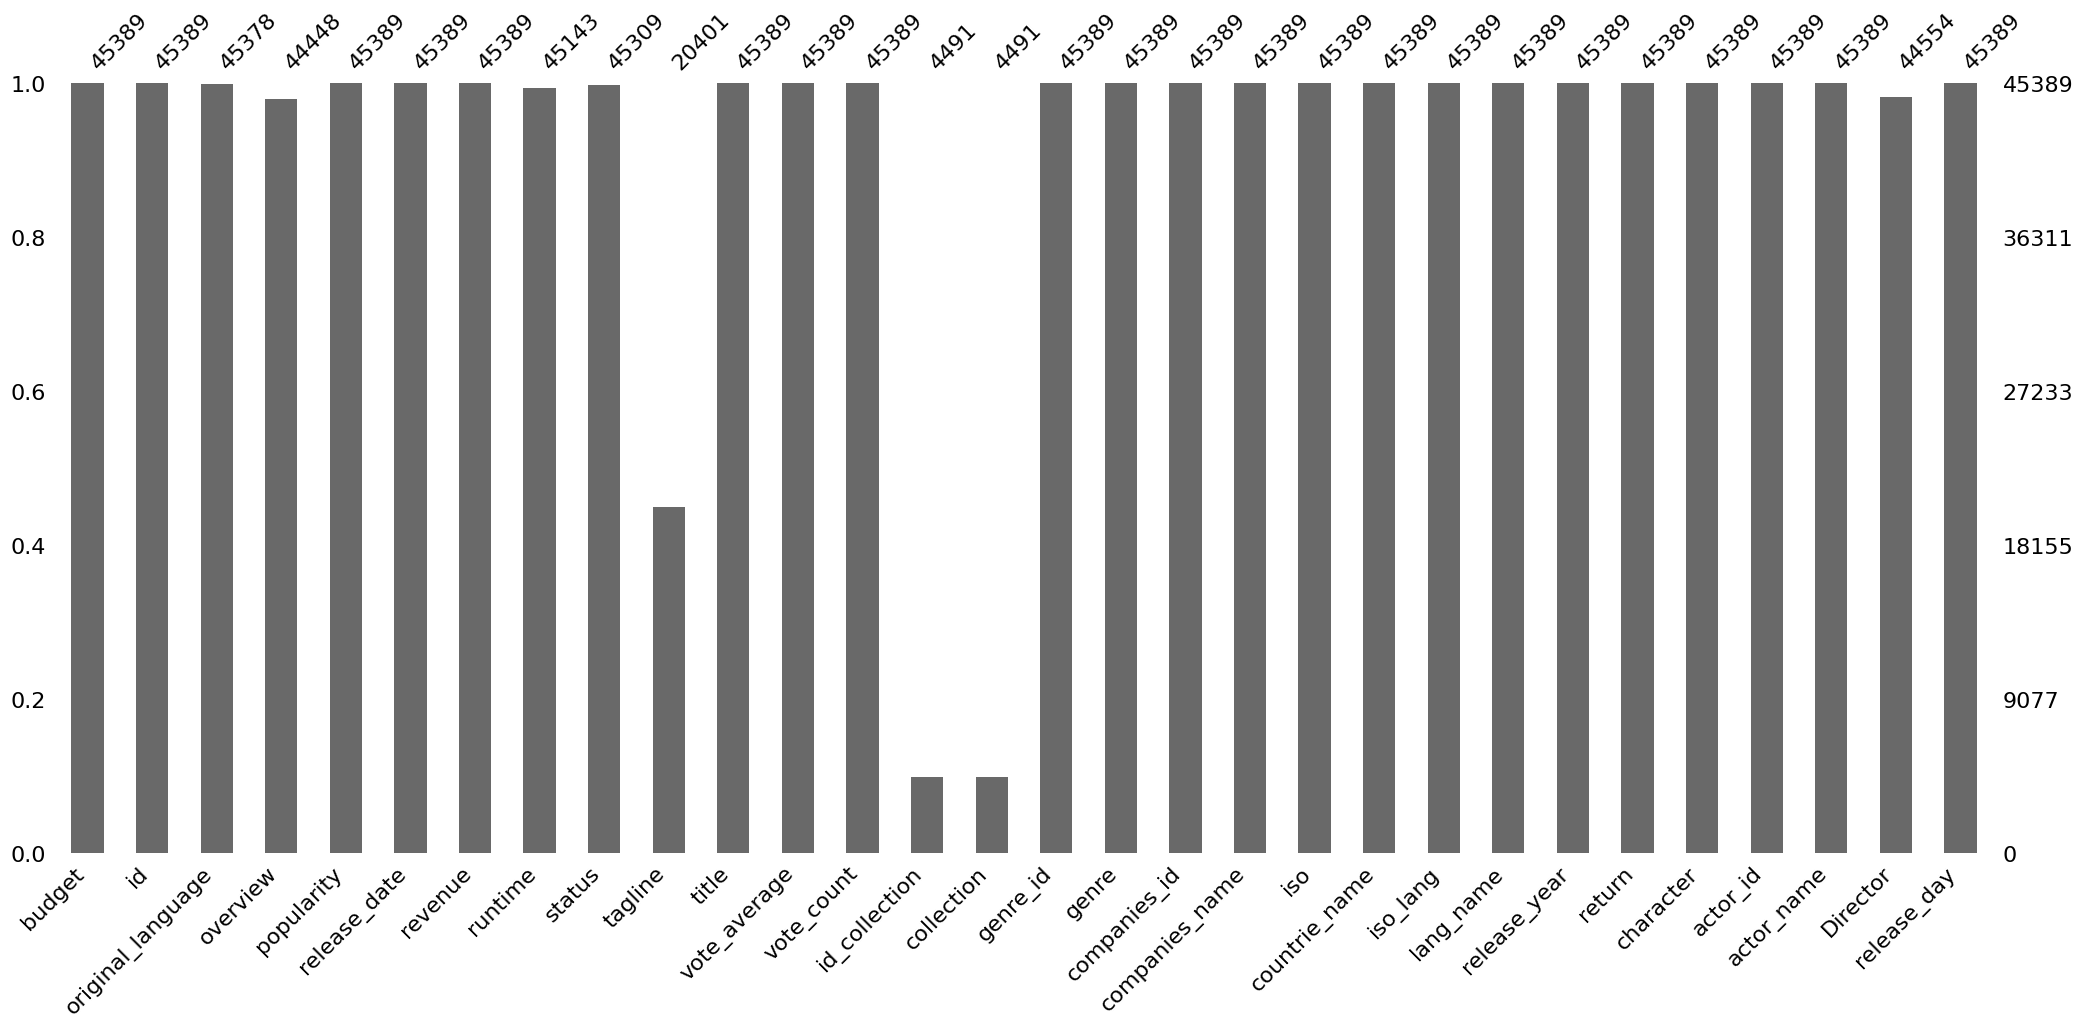

In [15]:
#visualising missing values
msno.bar(df)

In [19]:
!{sys.executable} -m pip install -U pandas-profiling[notebook] # Install or upgrade pandas-profiling package
!jupyter nbextension enable --py widgetsnbextension # Enable the widgetsnbextension for interactive widgets

zsh:1: no matches found: pandas-profiling[notebook]
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [20]:
from ydata_profiling import ProfileReport #ydata_profiling is the actualization of pandas-profiling info: https://pypi.org/project/pandas-profiling/
# documentation: https://ydata-profiling.ydata.ai/docs/master/

In [21]:
# Generate de profiling report
profile = ProfileReport(df)

In [22]:
# The Notebook Widgets Interface
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Or use the HTML report
profile

In [33]:
# Top 5 most popular titles
top_popular_titles = df.nlargest(5, 'popularity')[['title', 'popularity']]

# Top 5 directors with the most films
top_directors = df['Director'].value_counts().head(5)

# Top 5 actors with the most films
top_actors = df['actor_name'].explode().value_counts().head(5)

# Top 5 categories most present in the dataset
top_categories = df['genre'].explode().value_counts().head(5)

# Top 5 countries most present in the dataset
top_countries = df['countrie_name'].explode().value_counts().head(5)

# Top 5 languages most present in the dataset
top_languages = df['lang_name'].explode().value_counts().head(5)

# Create a new DataFrame with the top 5 values for each category
top_values_df = pd.DataFrame({
    'Top 5 Popular Titles': top_popular_titles['title'],
    'Popularity': top_popular_titles['popularity'],
    'Top 5 Directors': top_directors.index,
    'Number of Films by Director': top_directors.values,
    'Top 5 Actors': top_actors.index,
    'Number of Films by Actor': top_actors.values,
    'Top 5 Categories': top_categories.index,
    'Number of Films by Category': top_categories.values,
    'Top 5 Countries': top_countries.index,
    'Number of Films by Country': top_countries.values,
    'Top 5 Languages': top_languages.index,
    'Number of Films by Language': top_languages.values
})

# Display the new DataFrame
print(print('*'*20,'Top 5 Categoricals in DF', '*'*20))
top_values_df


******************** Top 5 Categoricals in DF ********************
None


,Top 5 Popular Titles,Popularity,Top 5 Directors,Number of Films by Director,Top 5 Actors,Number of Films by Actor,Top 5 Categories,Number of Films by Category,Top 5 Countries,Number of Films by Country,Top 5 Languages,Number of Films by Language
30687,Minions,547.488298,John Ford,63,Bess Flowers,241,Drama,20260,United States of America,21150,English,28735
33339,Wonder Woman,294.337037,Michael Curtiz,61,Christopher Lee,148,Comedy,13183,United Kingdom,4094,Français,4198
42168,Beauty and the Beast,287.253654,Werner Herzog,52,John Wayne,125,Thriller,7623,France,3940,Deutsch,2625
43583,Baby Driver,228.032744,Alfred Hitchcock,52,Samuel L. Jackson,123,Romance,6734,Germany,2256,Español,2412
24439,Big Hero 6,213.849907,Georges Méliès,51,Gérard Depardieu,110,Action,6595,Italy,2168,Italiano,2366


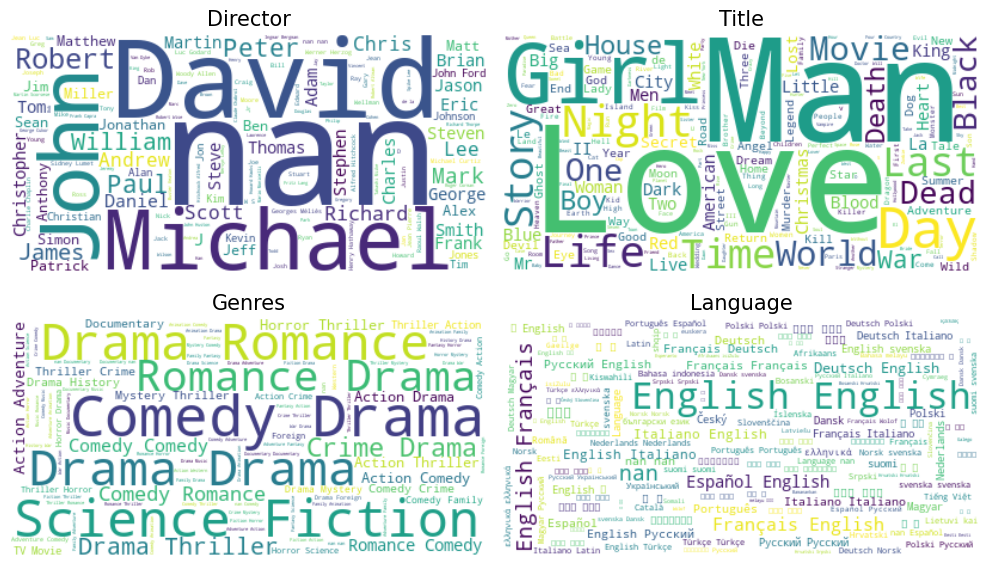

In [76]:
# WordClouds for Director, Title, Genre and Language

text_director = ' '.join(df['Director'].fillna('', axis=0).tolist())
clouddirector = WordCloud(background_color='white').generate(text_director)
texttitle = ' '.join(df['title'].dropna())
cloudtitle = WordCloud(background_color='white').generate(texttitle)
textgenre = ' '.join(df['genre'].explode().astype(str))
cloudgenre = WordCloud(background_color='white').generate(textgenre)
textlang = ' '.join(df['lang_name'].dropna().explode().astype(str))
cloudlang = WordCloud(background_color='white').generate(textlang)
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0,0].imshow(clouddirector, interpolation='bilinear')
ax[0,0].set_title('Director', fontsize=15, color='black')
ax[0,0].axis('off')

ax[0,1].imshow(cloudtitle, interpolation='bilinear')
ax[0,1].set_title('Title', fontsize=15, color='black')
ax[0,1].axis('off')

ax[1,0].imshow(cloudgenre, interpolation='bilinear')
ax[1,0].set_title('Genres', fontsize=15, color='black')
ax[1,0].axis('off')

ax[1,1].imshow(cloudlang, interpolation='bilinear')
ax[1,1].set_title('Language', fontsize=15, color='black')
ax[1,1].axis('off')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()


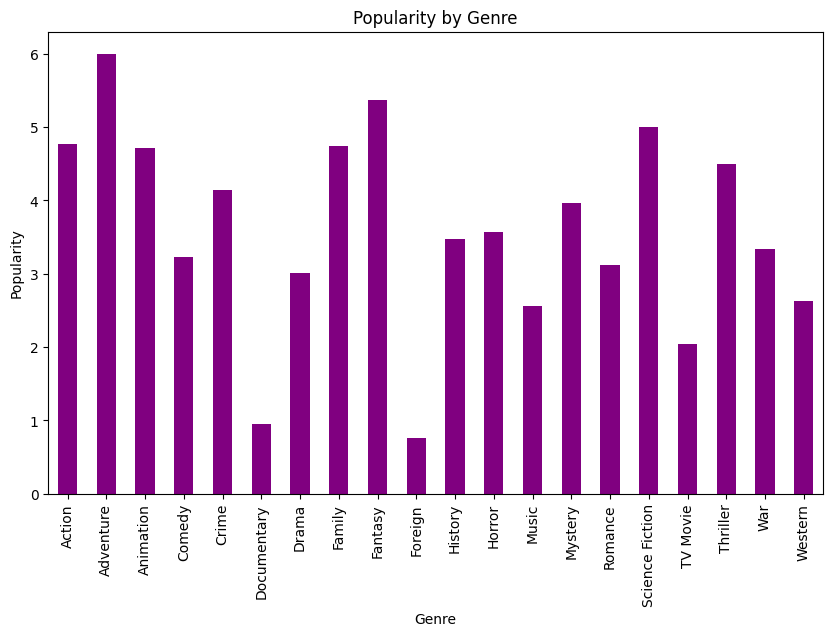

In [83]:
# Popularity by Genre
# Step 1: Preprocessing - Extract relevant columns (popularity and genre) from the DataFrame
data = df[['popularity', 'genre']]

# Step 2: Explode the 'genre' column to convert it into individual genres
data_exploded = data.explode('genre')

# Step 3: Calculate the average popularity per genre using groupby and mean
genre_popularity = data_exploded.groupby('genre')['popularity'].mean()

# Step 4: Create a bar plot to visualize popularity by genre
plt.figure(figsize=(10, 6))
genre_popularity.plot(kind='bar', color='purple')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Popularity by Genre')
plt.show()


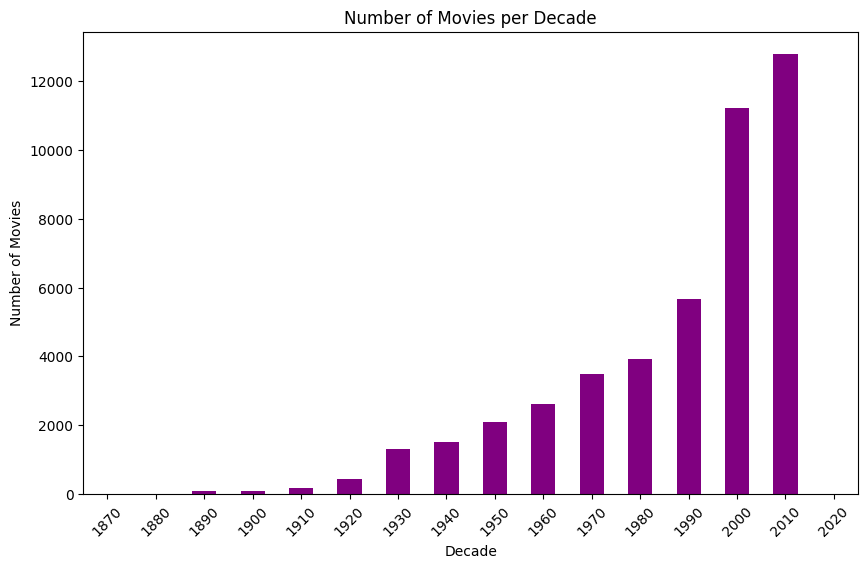

In [90]:
# Number of Movies per Decade

# Extract the release year from the 'release_year' column
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y').dt.year

# Create a new column for the decade
df['decade'] = (df['release_year'] // 10) * 10

# Count the number of movies per decade
movies_per_decade = df['decade'].value_counts().sort_index()

# Plot the number of movies per decade
plt.figure(figsize=(10, 6))
movies_per_decade.plot(kind='bar', color='purple')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Decade')
plt.xticks(rotation=45)
plt.show()

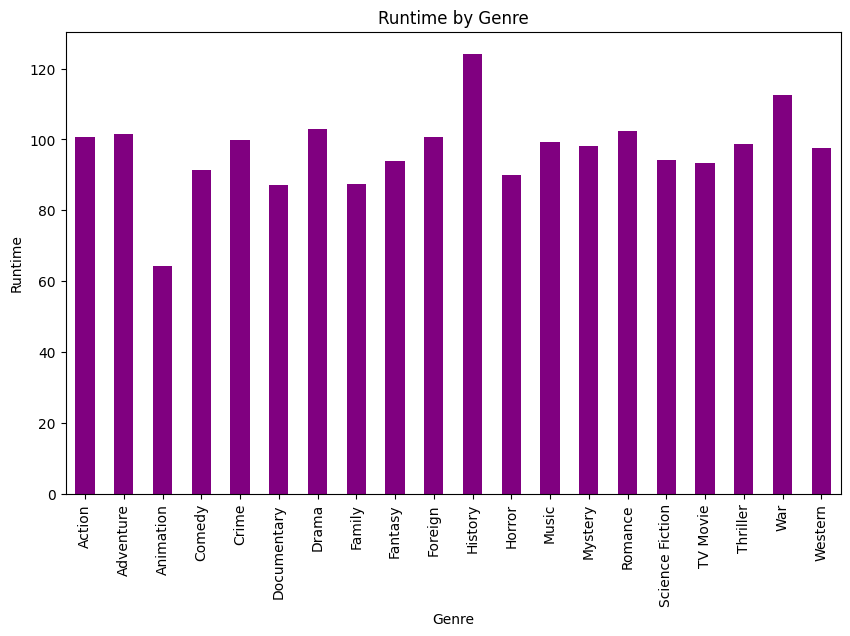

In [94]:
# Runtime by Genre

# Step 1: Preprocessing - Extract relevant columns (popularity and genre) from the DataFrame
data = df[['runtime', 'genre']]

# Step 2: Explode the 'genre' column to convert it into individual genres
data_exploded = data.explode('genre')

# Step 3: Calculate the average popularity per genre using groupby and mean
genre_runtime = data_exploded.groupby('genre')['runtime'].mean()

# Step 4: Create a bar plot to visualize popularity by genre
plt.figure(figsize=(10, 6))
genre_runtime.plot(kind='bar', color='purple')
plt.xlabel('Genre')
plt.ylabel('Runtime')
plt.title('Runtime by Genre')
plt.show()

In [107]:
# OUTLIERS

# I decided to consider outliers, movies with runtime over 300 mins and under 20 mins

maskover = df['runtime'] > 300
maskunder = df['runtime'] < 20

In [136]:
# There are several columns wtih a runtime of zero values.
df[maskunder][['title','runtime', 'release_year', 'genre']].head()

,title,runtime,release_year,genre
222,Dream Man,0.0,1995,[Thriller]
224,Destiny Turns on the Radio,0.0,1995,"[Crime, Comedy, Fantasy]"
398,Dos Crímenes,0.0,1995,[]
554,"The Beans of Egypt, Maine",0.0,1994,[]
667,The Run of the Country,0.0,1995,"[Drama, Romance]"


In [135]:
# Over 300 minutes there are miniseries and documentarys
df[maskover][['title','runtime', 'release_year', 'genre']].head()

,title,runtime,release_year,genre
6751,Shoah,566.0,1985,[Documentary]
7420,Tinker Tailor Soldier Spy,320.0,1979,"[Thriller, Drama, Mystery]"
7425,The Best of Youth,366.0,2003,[Drama]
7938,The Deluge,315.0,1974,"[History, Adventure, War]"
8641,War and Peace,422.0,1966,"[War, Drama, History, Romance]"
